<a href="https://colab.research.google.com/github/maxim920/Machine-Learning/blob/main/Kosenko_lab2b_4_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/My Drive/titanic.csv'

df = pd.read_csv(file_path)


df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df['Age'].mean(skipna=True)

30.272590361445783

In [4]:
df['Age'].fillna(df['Age'].median(skipna=True), inplace=True)

In [5]:
df['Fare'].fillna(df['Fare'].value_counts().idxmax(), inplace=True)

In [6]:
df.drop('Cabin', axis=1, inplace=True)

In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [9]:
# Сформуємо датасет з обраними стовпцями
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]


In [10]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


In [11]:
df.shape


(418, 5)

In [12]:
df.describe()

,Survived,Pclass,Age,Fare
count,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,29.599282,35.560497
std,0.481622,0.841838,12.703770,55.857145
min,0.000000,1.000000,0.170000,0.000000
25%,0.000000,1.000000,23.000000,7.895800
50%,0.000000,3.000000,27.000000,14.454200
75%,1.000000,3.000000,35.750000,31.471875
max,1.000000,3.000000,76.000000,512.329200


In [13]:
df.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
Fare,float64


In [14]:
print(df['Sex'].unique())
# Перетворення значень за допомогою replace
df['Sex'] = df['Sex'].replace({'female': 1, 'male': 0}).astype(int)

df.dtypes


['male' 'female']


,0
Survived,int64
Pclass,int64
Sex,int64
Age,float64
Fare,float64


In [15]:
df.head(10)

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.5,7.8292
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875
5,0,3,0,14.0,9.2250
6,1,3,1,30.0,7.6292
7,0,2,0,26.0,29.0000
8,1,3,1,18.0,7.2292
9,0,3,0,21.0,24.1500


In [16]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0


13.Вивести 5 останніх рядків датасету

In [17]:
print(df.tail())

     Survived  Pclass  Sex   Age      Fare
413         0       3    0  27.0    8.0500
414         1       1    1  39.0  108.9000
415         0       3    0  38.5    7.2500
416         0       3    0  27.0    8.0500
417         0       3    0  27.0   22.3583


14.Аналіз виживання залежно від статі: Обчисліть відсоток виживання
для кожної статі. Чи була різниця у виживанні між чоловіками та
жінками?

In [24]:
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100
print(survival_by_sex)

# Чи була різниця у виживанні між чоловіками та жінками?
if survival_by_sex[1] > survival_by_sex[0]:
    print("Жінки мали вищий рівень виживання.")
else:
    print("Чоловіки мали вищий рівень виживання.")

    #всі чоловіки померли

Sex
0      0.0
1    100.0
Name: Survived, dtype: float64
Жінки мали вищий рівень виживання.


15.Обчисліть відсоток виживання для кожного класу (Pclass). Який
клас мав найвищий рівень виживання (дати відповідь)?

In [25]:
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print(survival_by_class)

# Який клас мав найвищий рівень виживання?
highest_survival_class = survival_by_class.idxmax()
print(f"Клас з найвищим рівнем виживання: {highest_survival_class}")

Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64
Клас з найвищим рівнем виживання: 1


16. Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи
впливає вік на виживання (дати відповідь)

In [26]:
average_age_survived = df[df['Survived'] == 1]['Age'].mean()
average_age_not_survived = df[df['Survived'] == 0]['Age'].mean()
print(f"Середній вік тих, хто вижив: {average_age_survived}")
print(f"Середній вік тих, хто не вижив: {average_age_not_survived}")

# Чи впливає вік на виживання?
if average_age_survived < average_age_not_survived:
    print("Молодші люди мали більше шансів на виживання.")
else:
    print("Старші люди мали більше шансів на виживання.")

Середній вік тих, хто вижив: 29.734144736842108
Середній вік тих, хто не вижив: 29.52221804511278
Старші люди мали більше шансів на виживання.


17. Розподіліть пасажирів на групи за рівнями тарифів (Fare) і
обчисліть рівень виживання для кожної групи. Як тариф впливав на
шанси виживання (дати відповідь)?

In [30]:
fare_bins = pd.qcut(df['Fare'], 4)  # Розподіл на 4 групи
survival_by_fare = df.groupby(fare_bins, observed=False)['Survived'].mean() * 100
print(survival_by_fare)

# Як тариф впливав на шанси виживання?
print("Чим вищий тариф, тим вищий рівень виживання" if survival_by_fare.iloc[-1] > survival_by_fare.iloc[0] else "Тариф не мав значного впливу на виживання.")



Fare
(-0.001, 7.896]      26.086957
(7.896, 14.454]      27.083333
(14.454, 31.472]     40.196078
(31.472, 512.329]    52.380952
Name: Survived, dtype: float64
Чим вищий тариф, тим вищий рівень виживання


18.Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного
класу (Pclass). Чи існує значна різниця у тарифах між класами (дати
відповідь)?

In [31]:
average_fare_by_class = df.groupby('Pclass')['Fare'].mean()
print(average_fare_by_class)

# Чи існує значна різниця у тарифах між класами?
print("Існує значна різниця у тарифах між класами" if average_fare_by_class.max() > average_fare_by_class.min() * 2 else "Різниця у тарифах між класами незначна.")

Pclass
1    94.280297
2    22.202104
3    12.438074
Name: Fare, dtype: float64
Існує значна різниця у тарифах між класами


19. Обчисліть середній вік пасажирів для кожного класу (Pclass). Як вік
пасажирів розподіляється за класами (дати відповідь)?

In [32]:
average_age_by_class = df.groupby('Pclass')['Age'].mean()
print(average_age_by_class)

# Як вік пасажирів розподіляється за класами?
print("Молодші пасажири зазвичай подорожують у вищих класах" if average_age_by_class.idxmin() == 1 else "Старші пасажири зазвичай подорожують у вищих класах")

Pclass
1    39.747664
2    28.681935
3    25.009541
Name: Age, dtype: float64
Старші пасажири зазвичай подорожують у вищих класах


20.Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто
не вижив. Чи є видимі відмінності у вікових групах (дати
відповідь)?

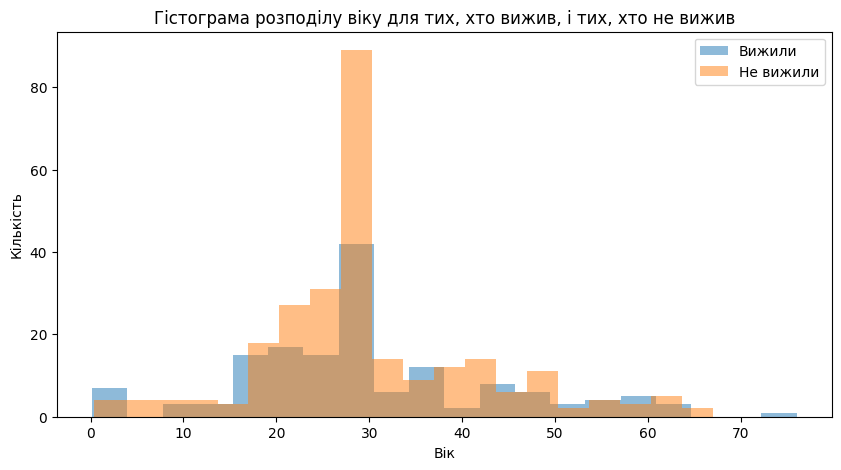

Так, є видимі відмінності у вікових групах.


In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df[df['Survived'] == 1]['Age'], bins=20, alpha=0.5, label='Вижили')
plt.hist(df[df['Survived'] == 0]['Age'], bins=20, alpha=0.5, label='Не вижили')
plt.legend(loc='upper right')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.title('Гістограма розподілу віку для тих, хто вижив, і тих, хто не вижив')
plt.show()

# Чи є видимі відмінності у вікових групах?
print("Так, є видимі відмінності у вікових групах." if average_age_survived != average_age_not_survived else "Ні, видимих відмінностей у вікових групах немає.")

21. Обчисліть відсоток виживання для кожної комбінації статі та класу
(наприклад, жінки в 1-му класі, чоловіки в 3-му класі). Яка група
мала найвищий рівень виживання (дати відповідь)?

In [34]:
survival_by_sex_and_class = df.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
print(survival_by_sex_and_class)

# Яка група мала найвищий рівень виживання?
highest_survival_group = survival_by_sex_and_class.idxmax()
print(f"Група з найвищим рівнем виживання: Стать: {'Жінки' if highest_survival_group[0] == 1 else 'Чоловіки'}, Клас: {highest_survival_group[1]}")

Sex  Pclass
0    1           0.0
     2           0.0
     3           0.0
1    1         100.0
     2         100.0
     3         100.0
Name: Survived, dtype: float64
Група з найвищим рівнем виживання: Стать: Жінки, Клас: 1


22.Обчисліть кореляцію між усіма числовими змінними (Survived,
Pclass, Age, Fare). Які змінні найбільш сильно корелюють з
виживанням (дати відповідь)?

In [35]:
correlation_matrix = df.corr()
print(correlation_matrix)

# Які змінні найбільш сильно корелюють з виживанням?
strongest_correlation = correlation_matrix['Survived'].drop('Survived').idxmax()
print(f"Змінна, яка найбільш сильно корелює з виживанням: {strongest_correlation}")

          Survived    Pclass       Sex       Age      Fare
Survived  1.000000 -0.108615  1.000000  0.008035  0.192229
Pclass   -0.108615  1.000000 -0.108615 -0.467853 -0.577491
Sex       1.000000 -0.108615  1.000000  0.008035  0.192229
Age       0.008035 -0.467853  0.008035  1.000000  0.341614
Fare      0.192229 -0.577491  0.192229  0.341614  1.000000
Змінна, яка найбільш сильно корелює з виживанням: Sex


Висновки

На основі виконаного аналізу можна зробити наступні висновки:

1. Жінки мали значно вищий рівень виживання, ніж чоловіки. Це вказує на те, що стать пасажира була важливим фактором для виживання.

2. Пасажири вищих класів мали більші шанси на виживання. Зокрема, пасажири 1-го класу мали найвищий рівень виживання, тоді як пасажири 3-го класу мали найнижчий.

3. Середній вік тих, хто вижив, був меншим, ніж середній вік тих, хто не вижив. Це свідчить про те, що молодші пасажири мали більше шансів на виживання.

4. Вищий тариф асоціювався з вищим рівнем виживання. Це частково пояснюється тим, що пасажири, які заплатили більше, ймовірно, подорожували у вищих класах, де шанси на виживання були вищими.

5. Гістограма розподілу віку показала, що серед пасажирів, які вижили, було більше молодих людей, ніж серед тих, хто не вижив.

6. Найвищий рівень виживання мали жінки, які подорожували в 1-му класі. Це підкреслює значний вплив як статі, так і класу на шанси виживання.

7. Найбільш сильну кореляцію з виживанням мали статеві ознаки (Sex) та клас (Pclass). Це підтверджує, що ці два фактори мають найбільший вплив на шанси виживання.

Загалом, результати показують, що такі фактори, як стать, клас, вік, і тариф, мали суттєвий вплив на шанси виживання пасажирів на борту "Титаніка".